## Table of Contents

- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Preliminary Data Analysis](#PDA)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
- [Correlation Analysis](#Correlation-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)

If you find this notebook useful, please consider upvoting it.

## Introduction

In [2]:
import pandas as pd
import seaborn as sns 
import zipfile
# import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
# import plotly.io as pio
# pio.renderers.default = 'notebook'  # or 'iframe_connected'
# pio.renderers.default = 'iframe_connected'

## Customer Tipping Patterns Analysis 

## Data Loading

In [3]:
# loading the dataset
zip_path=r'C:\Users\User\Desktop\ABEOKUTA\AI_Engineer\Machine_Learning_Project\datasets\tipprediction.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    zip_ref.extractall('dataset')

with zipfile.ZipFile(zip_path) as z:
    with z.open(r'tip.csv','r') as f:
        w_wine = pd.read_csv(f, sep=",")
        df = w_wine.copy()


File Name                                             Modified             Size
tip.csv                                        2025-10-26 14:33:52         7943


# PDA

In [4]:
df.shape

(244, 7)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


The total bill standard deviation is showing that some people bought more and they are more valuable or rich customers 

In [8]:
df[df['tip']==0]

,total_bill,tip,sex,smoker,day,time,size


<Axes: >

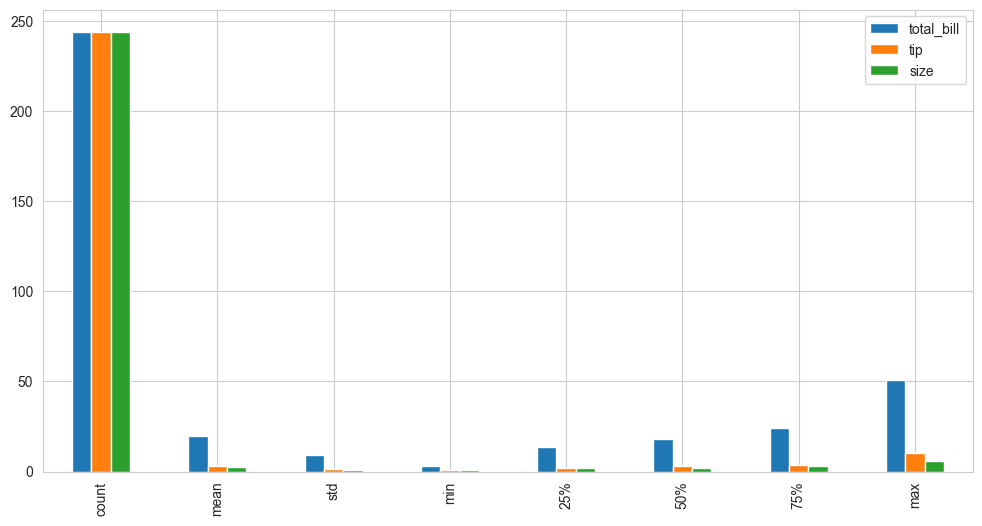

In [9]:
df.describe().plot(kind="bar",figsize=(12,6))

# Data Cleaning & Handling

In [10]:
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.loc[df.duplicated()]


,total_bill,tip,sex,smoker,day,time,size


# EDA

In [11]:
df["tip_percentage"] = (df["tip"] / df["total_bill"]) * 100  # Creating a “Tip Percentage” column — because context matters. A $10 tip on a $200 bill isn’t the same as a $10 tip on a $40 meal.
df["tip_percentage"] = df["tip_percentage"].round(2)

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [13]:
numerical =df.select_dtypes(include=['float64','int64']).columns

numerical=numerical.drop('tip')

In [14]:
categorical = df.select_dtypes(include='object').columns


In [15]:
# univariate analysis of the 
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


In [16]:
max(df['total_bill'])

50.81

 Feature: total_bill
       total_bill
count  243.000000
mean    19.813868
std      8.910071
min      3.070000
25%     13.380000
50%     17.810000
75%     24.175000
max     50.810000

Skewness: 1.127
Kurtosis: 1.206


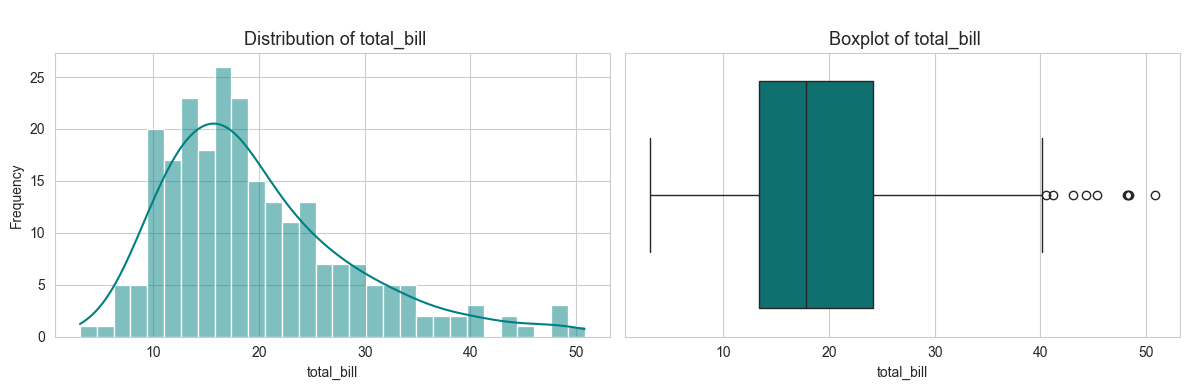


 total_bill is highly skewed. Consider log or Box-Cox transformation.
 Feature: size
             size
count  243.000000
mean     2.572016
std      0.952356
min      1.000000
25%      2.000000
50%      2.000000
75%      3.000000
max      6.000000

Skewness: 1.442
Kurtosis: 1.712


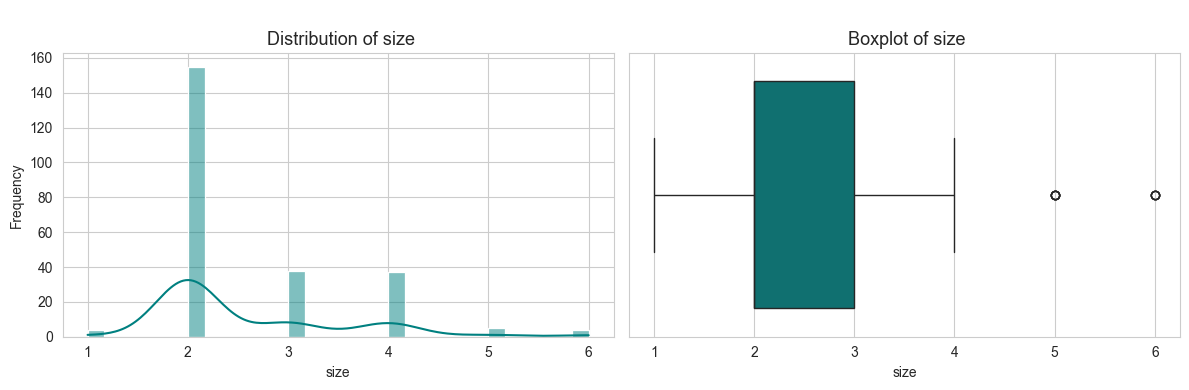


 size is highly skewed. Consider log or Box-Cox transformation.
 Feature: tip_percentage
       tip_percentage
count      243.000000
mean        16.082634
std          6.119458
min          3.560000
25%         12.880000
50%         15.520000
75%         19.175000
max         71.030000

Skewness: 3.341
Kurtosis: 27.004


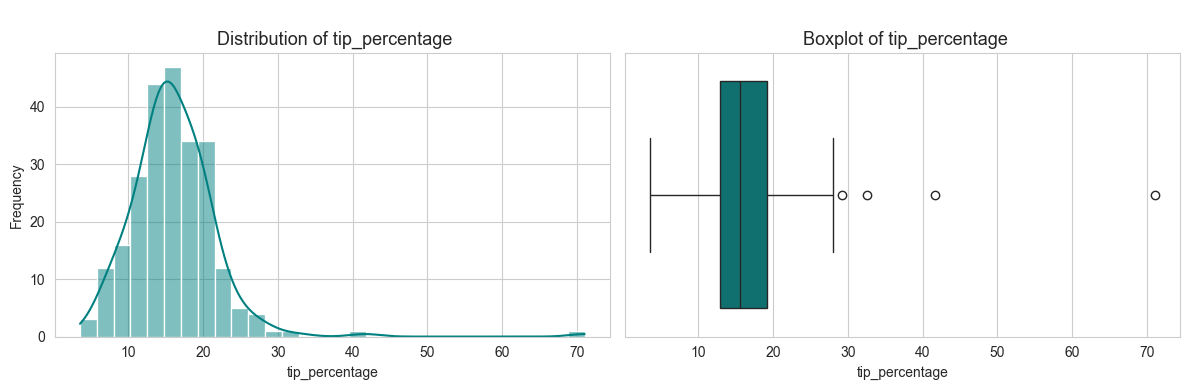


 tip_percentage is highly skewed. Consider log or Box-Cox transformation.


In [17]:
for column in numerical:
    univariate_numerical_eda(df,column)

In [18]:

def univariate_categorical(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


Feature: sex
        Count  Percentage
sex                      
Male      157       64.61
Female     86       35.39



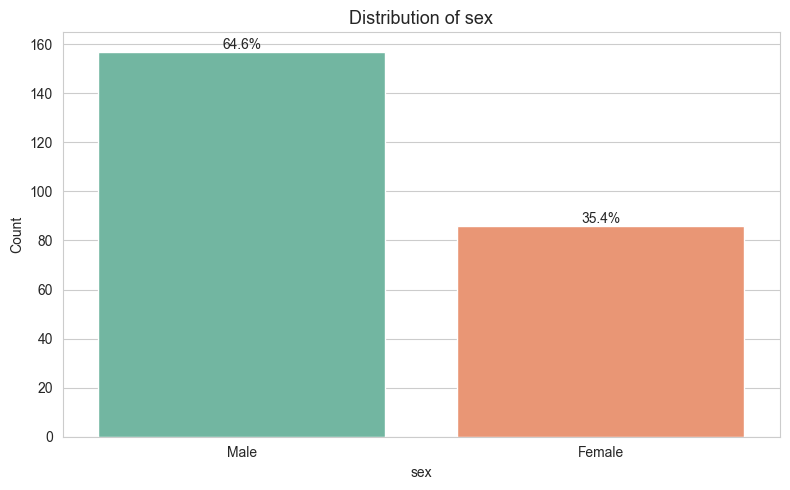

Feature: smoker
        Count  Percentage
smoker                   
No        151       62.14
Yes        92       37.86



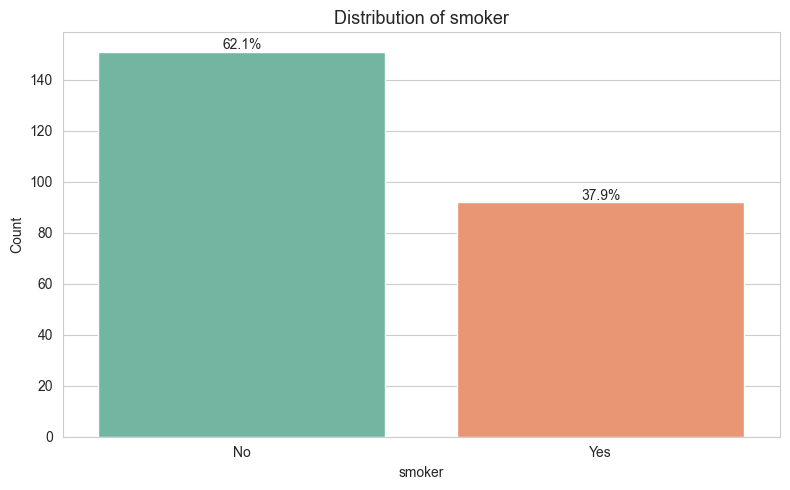

Feature: day
      Count  Percentage
day                    
Sat      87       35.80
Sun      76       31.28
Thur     61       25.10
Fri      19        7.82



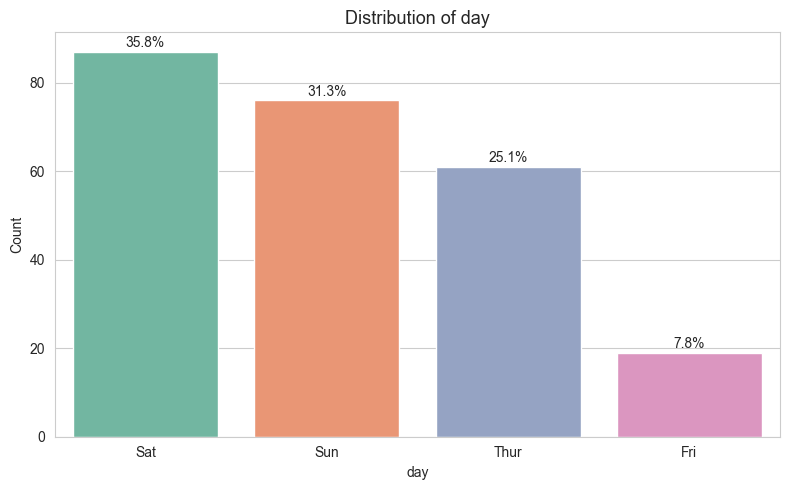

Feature: time
        Count  Percentage
time                     
Dinner    176       72.43
Lunch      67       27.57



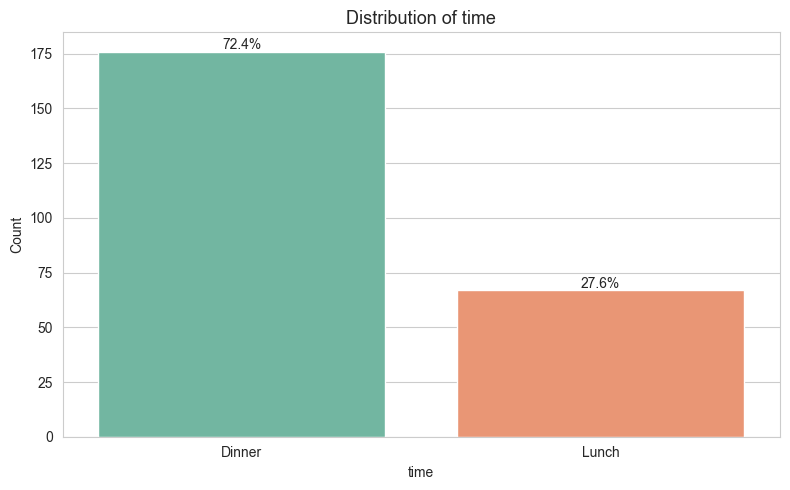

In [19]:
for column in categorical:
    univariate_categorical(df,column)

In [20]:
def high_low(col):
    print(f"{col} Max value:", df[col].max())
    print(f"{col} Min value:", df[col].min())


for i in numerical:
    high_low(i)


total_bill Max value: 50.81
total_bill Min value: 3.07
size Max value: 6
size Min value: 1
tip_percentage Max value: 71.03
tip_percentage Min value: 3.56


In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


# Most tips given by which gender,the tip value and the time

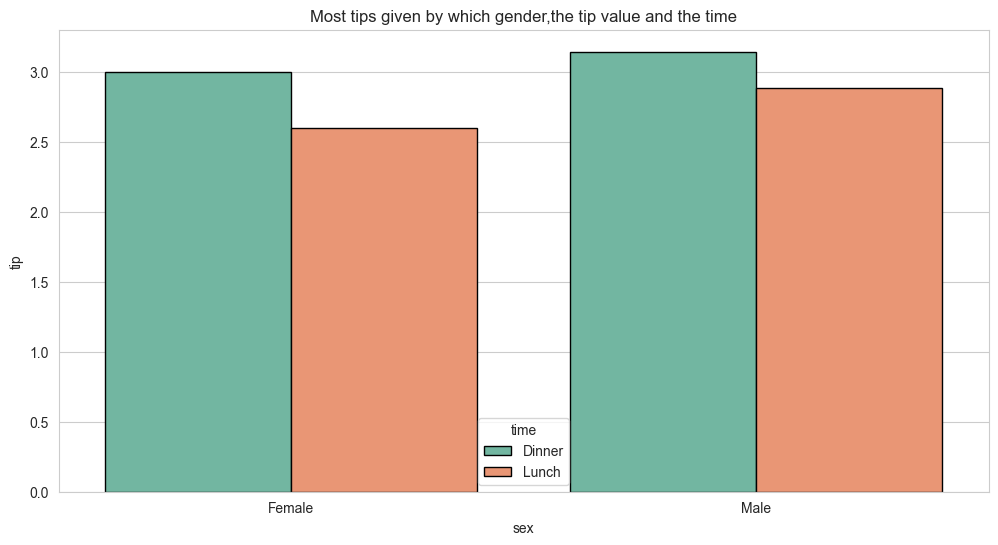

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='sex',y='tip',hue="time",ci=None,edgecolor="black",palette="Set2")
plt.title("Most tips given by which gender,the tip value and the time")
plt.show()

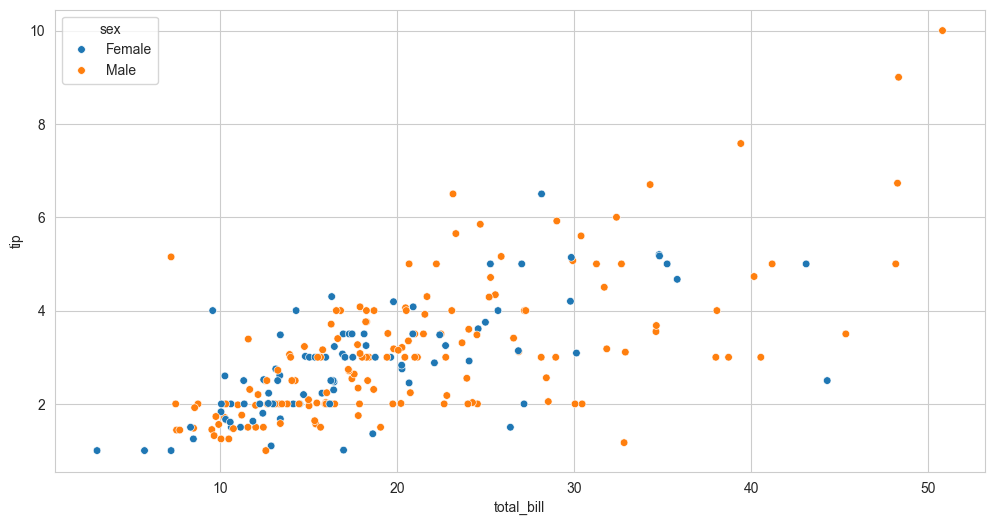

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="total_bill",y="tip",hue="sex",s=30)
plt.show()

In [24]:
import plotly.express as px

fig = px.scatter(
    df,
    x="total_bill",
    y="tip",
    color="sex",
    title="Interactive Scatter Plot: Tip vs Total Bill by Gender",
    labels={"total_bill": "Total Bill", "tip": "Tip"},
    width=1000,
    height=500
)

fig.update_traces(marker=dict(size=6))  # Adjust point size
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
sns.barplot(data=df,x=df["smoker"],y=df["tip_percentage"],hue=df["sex"],ci=None,edgecolor="black",palette="Set3")
plt.title("Tip percentage by smoker and gender")
plt.show()

In [ ]:
import plotly.express as px

fig1 = px.bar(
    df,
    x="smoker",
    y="tip_percentage",
    color="sex",
    barmode="group",
    title="Tip Percentage by Smoker and Gender",
    labels={"smoker": "Smoker Status", "tip_percentage": "Tip Percentage", "sex": "Gender"},
    width=1000,
    height=500
)
fig1.show()


In [ ]:
# 3. Bar chart: average tip by time (Lunch/Dinner)
avg_tip_by_time = df.groupby("time", as_index=False)["tip"].mean()
fig3 = px.bar(
    avg_tip_by_time, x="time", y="tip", color="time",
    title="Average Tip by Time of Day",
    labels={"tip": "Average Tip", "time": "Time"},
    width=800, height=500
)
fig3.show()



# 5. Histogram: total_bill colored by sex
fig5 = px.histogram(
    df, x="total_bill", color="sex",
    title="Distribution of Total Bill by Gender",
    labels={"total_bill": "Total Bill"},
    nbins=30,
    width=1000, height=500
)
fig5.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="size",
    y="tip",
    hover_data=["total_bill"],  # Wrap in a list
    title="Interactive Scatter Plot: Correlatiion Bteween Tip,Number of guest and total bill",
    labels={"total_bill": "Total Bill", "tip": "Tip"},
    width=1000,
    height=500
)

fig.update_traces(marker=dict(size=8))  # Optional: adjust point size
fig.show()


In [ ]:
cor=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,fmt=".2f")
plt.title("Correlation between Total bill,Tip and Size")
plt.show()